**Lending Club Default Analysis**

1. Data understanding 
2. Data Cleaning and Manipulation
3. Data Analysis
   
    a. Univariate analysis

    b. segmented univariate analysis
   
    c. Bivariate analysis


In [1]:
# Importing the Python Libraries and loading the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as mtick
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)

# Load the dataset
df_loan=pd.read_csv("loan.csv")

/var/folders/cd/76l_616x6gg2gx989nn1m4q00000gq/T/ipykernel_19402/4187129020.py:11: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan=pd.read_csv("loan.csv")


In [2]:
# df_loan.info() -> Provides summary of the DataFrame
df_loan.info()
#df_loan.shape -> returns a tuple with the number of rows and columns in the DataFrame.
df_loan.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


(39717, 111)

In [3]:
# Printing the dataset
df_loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Identifying the columns that are completely empty or fully null and Printing the list of empty columns
empty_columns = df_loan.columns[df_loan.isnull().all()]
print("Empty Columns:", empty_columns)

# Identifying null columns and Printing the list of null columns
null_columns = df_loan.columns[df_loan.isnull().any()]
print("Columns with Null Values:", null_columns)

Empty Columns: Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
      

In [5]:
# Calculates the percentage of missing values for each column in df_loan
round((100*df_loan.isnull().sum())/len(df_loan.index))

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [6]:
missing_percentage = round((100 * df_loan.isnull().sum()) / len(df_loan.index))
# Filter and print columns with 100% missing values
columns_with_100_percent_missing = missing_percentage[missing_percentage == 100].index
print("Columns with 100% missing values:", columns_with_100_percent_missing)


Columns with 100% missing values: Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_o

In [7]:
# As a part of Data Cleaning -> Remove the columns which have high percentage of missing values for each column
df_loan.drop(columns=columns_with_100_percent_missing, inplace=True)

In [8]:
round((100*df_loan.isnull().sum())/len(df_loan.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [9]:
#Data Cleaning - Dropping columns in which NAN data > 60 %
df_loan.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
round((100*df_loan.isnull().sum())/len(df_loan.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
open_acc            

In [11]:
# now Identifying the null rows and Printing the list of null rows
df_loan.isnull().sum(axis=1)

0        1
1        0
2        2
3        0
4        0
        ..
39712    4
39713    4
39714    6
39715    6
39716    4
Length: 39717, dtype: int64

In [12]:
# Calculates the percentage of missing values for each rows in df_loan
round((100*df_loan.isnull().sum(axis=1))/len(df_loan.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

In [13]:
#checking if duplicate ids are present in dataframe
dup= df_loan[df_loan.duplicated(['id'])]
dup

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


There is no missing value present in row that's why not removing values from rows

In [14]:
# Removing the variables which are not required analysis point of view - For eg title will not required in analysis as it is same as purpose
df_loan = df_loan.drop(['title', 'url','desc', 'zip_code','member_id','policy_code', 'installment', 'delinq_2yrs', 'out_prncp_inv', 'out_prncp'], axis=1)

In [15]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [16]:
#int_rate is Object Type so converting it into Float type => It is part of Data Manipulation
df_loan['int_rate'] = pd.to_numeric(df_loan['int_rate'].str.rstrip('%'), errors='coerce')
type(df_loan['int_rate'][0])

numpy.float64

In [17]:
#Loan_status is object type and it is categorical variable 
df_loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [18]:
df_loan.loc[:, 'loan_status'] = df_loan['loan_status'].astype('category')
df_loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [19]:
df_loan = df_loan.query("loan_status in ['Fully Paid', 'Charged Off']")

In [20]:
# As per the Problem Statement we required only Fully Paid and Charged Off (defaulted label)
# Other than this Current account So we can't use this account because use-case of this account is not defined in the problem statement
# Removing the rows who has loan_status == "Current"
df_loan.drop(df_loan.loc[df_loan['loan_status'] == "Current"].index, inplace=True)

In [21]:
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,f,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,Apr-99,5,3,0,1687,9.40%,4,f,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,Nov-01,2,2,0,2956,98.50%,10,f,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,Feb-96,1,10,0,5598,21%,37,f,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,Nov-04,3,9,0,7963,28.30%,12,f,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


In [22]:
# Year and month columns are missing in dataset -> Extracting Year and Month from issue_d column 
df_loan['year'] = df_loan['issue_d'].str.split('-').str[1]

In [23]:
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year
0,1077501,5000,5000,4975.0,36 months,10.65,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,f,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11
1,1077430,2500,2500,2500.0,60 months,15.27,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,Apr-99,5,3,0,1687,9.40%,4,f,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11
2,1077175,2400,2400,2400.0,36 months,15.96,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,Nov-01,2,2,0,2956,98.50%,10,f,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11
3,1076863,10000,10000,10000.0,36 months,13.49,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,Feb-96,1,10,0,5598,21%,37,f,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11
5,1075269,5000,5000,5000.0,36 months,7.90,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,Nov-04,3,9,0,7963,28.30%,12,f,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11


In [24]:
df_loan['month'] = df_loan['issue_d'].str.split('-').str[0]

In [25]:
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,f,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
1,1077430,2500,2500,2500.0,60 months,15.27,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,Apr-99,5,3,0,1687,9.40%,4,f,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
2,1077175,2400,2400,2400.0,36 months,15.96,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,Nov-01,2,2,0,2956,98.50%,10,f,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
3,1076863,10000,10000,10000.0,36 months,13.49,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,Feb-96,1,10,0,5598,21%,37,f,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
5,1075269,5000,5000,5000.0,36 months,7.90,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,AZ,11.20,Nov-04,3,9,0,7963,28.30%,12,f,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec


**UniVariate Analysis - Performing Analysis using one variable**

In [26]:
#Calculate the no. of applicants Yearwise
applicant_counts = df_loan['year'].value_counts()
print(applicant_counts)

year
11    20516
10    11532
09     4716
08     1562
07      251
Name: count, dtype: int64


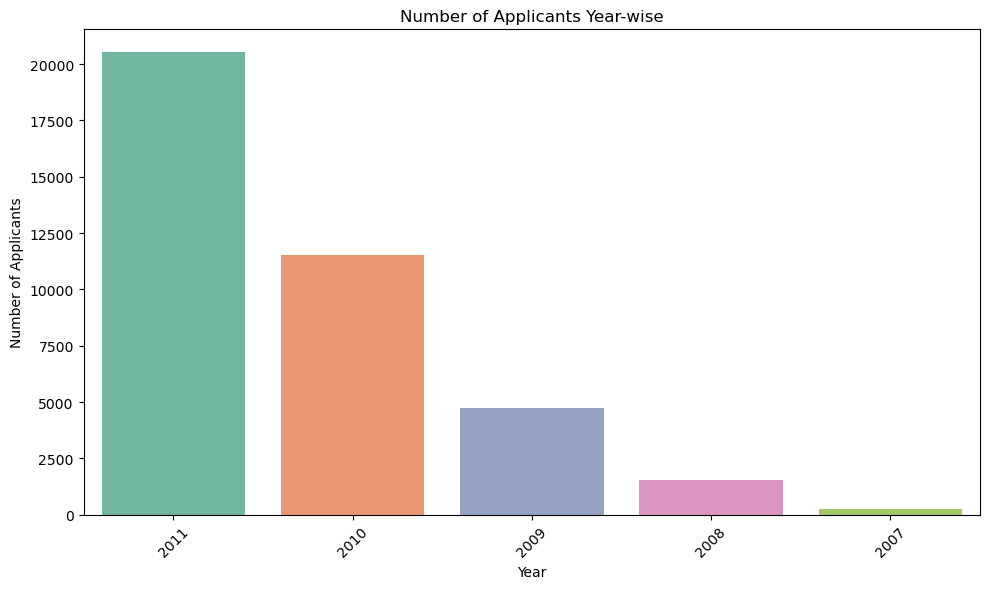

In [27]:
# Plot the number of applicants per year - Example of Univariate Analysis with categorical Variable - Year
plt.figure(figsize=(10, 6))
sb.countplot(x='year', data=df_loan, hue='year', palette='Set2')
years = ['2011','2010','2009','2008','2007'] 
plt.title('Number of Applicants Year-wise')
plt.xlabel('Year')
xpos=np.arange(len(years))
plt.ylabel('Number of Applicants')
plt.xticks(ticks=range(len(years)), labels=years, rotation=45)
plt.tight_layout()
plt.show()

This graph visualizes the number of loan applicants each year. The graph shows increasing heights of the bars from 2007 to 2011

In [28]:
#Print count of loan purposes by frequency (highest to lowest)
loan_purpose_counts = df_loan['purpose'].value_counts()
print(loan_purpose_counts)

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64


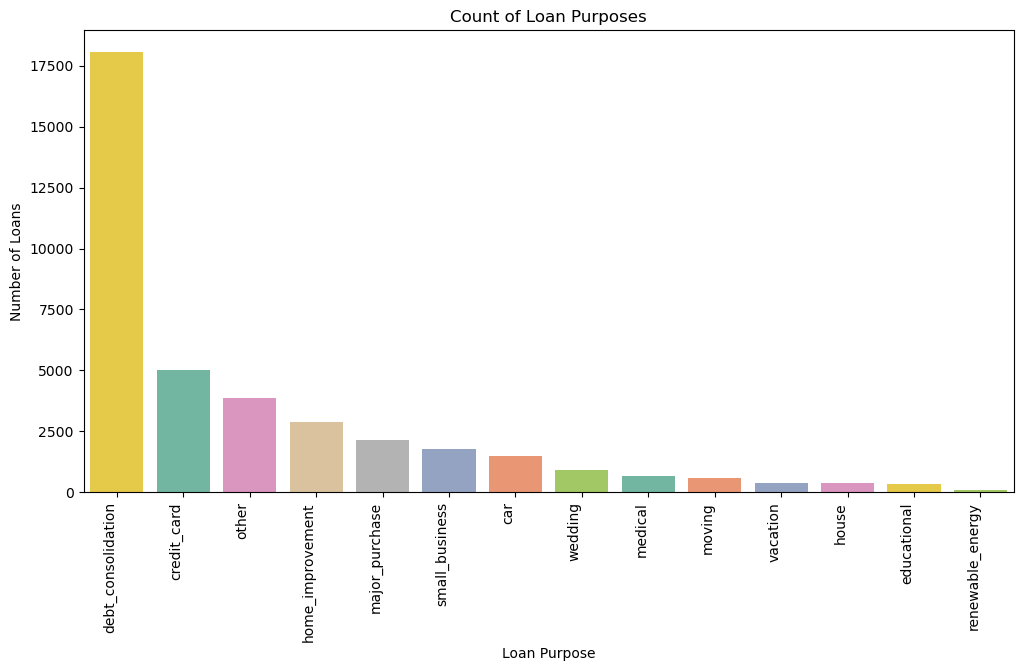

In [31]:
# Plot the count of loan purposes sorted by frequency (highest to lowest) 
# Example of Univariate Analysis with UnOrdered Categorical Variables
plt.figure(figsize=(12, 6))
sb.countplot(x='purpose', data=df_loan, hue='purpose', palette='Set2', order=loan_purpose_counts.index)
plt.title('Count of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90, ha='right')
plt.show()

This count plot shows how loan purposes are distributed across dataset. Major Purposes are debt_consolidation, credit_card, other, and so on.

In [32]:
#calculate Count of Loan by Grade wise
grade = df_loan['grade'].value_counts()
print(grade)

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64


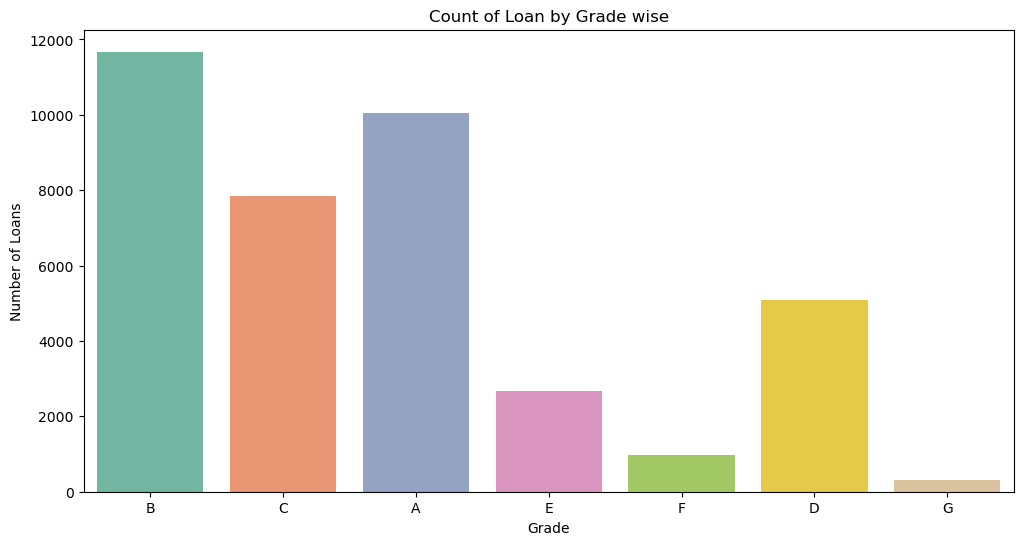

In [30]:
# Plot Graph for calculate Count of Loan by Grade wise - Example of Univariate Analysis with Ordered Categorical Variables
plt.figure(figsize=(12, 6))
sb.countplot(x='grade', data=df_loan, hue='grade', palette='Set2')
plt.title('Count of Loan by Grade wise')
plt.xlabel('Grade')
plt.ylabel('Number of Loans')
plt.show()

The count plot visualizes the distribution of loans by grade. Grade (B,C,A) have most number of loans.

In [33]:
#calculate Count of Loan by SubGrade wise
grade = df_loan['sub_grade'].value_counts().sort_values(ascending=False)
print(grade)

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64


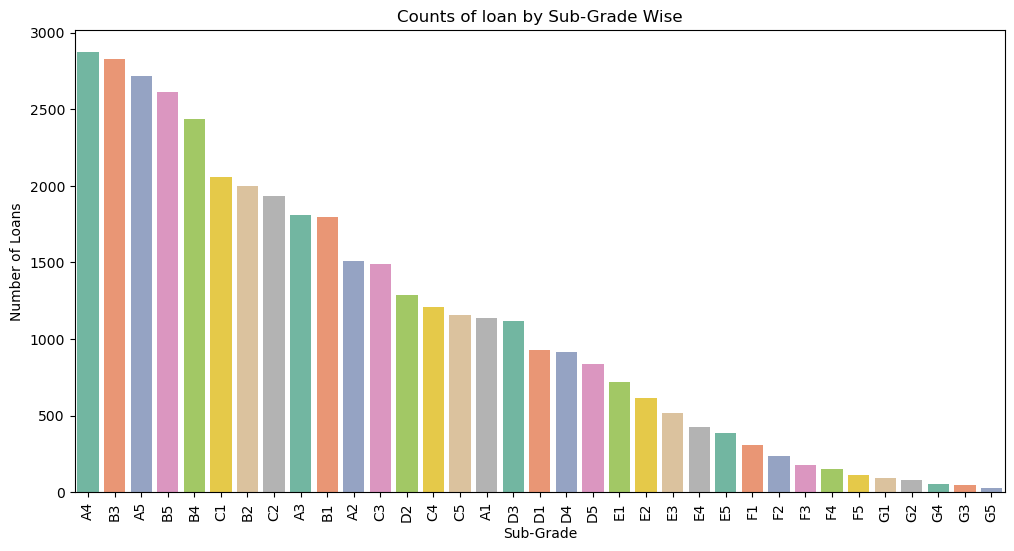

In [34]:
# Plot the Graph for calculate Count of Loan by SubGrade wise
# Example of Univariate Analysis with Ordered Categorical Variables
subgrade_df = df_loan['sub_grade'].value_counts().sort_values(ascending=False).reset_index()
subgrade_df.columns = ['sub_grade', 'count']

plt.figure(figsize=(12, 6))
sb.barplot(x='sub_grade', y='count', data=subgrade_df, palette='Set2',hue='sub_grade')
plt.title('Counts of loan by Sub-Grade Wise')
plt.xlabel('Sub-Grade')
plt.ylabel('Number of Loans')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

The count plot visualizes the distribution of loans by sub-grade. SubGrade (A4,B3,A5) have most number of loans which is same as what we analysed with Number of loans by Grade in Previous Graph.

In [35]:
#Calculate the value counts for 'verification_status'
verification_status = df_loan['verification_status'].value_counts()
print(verification_status)

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64


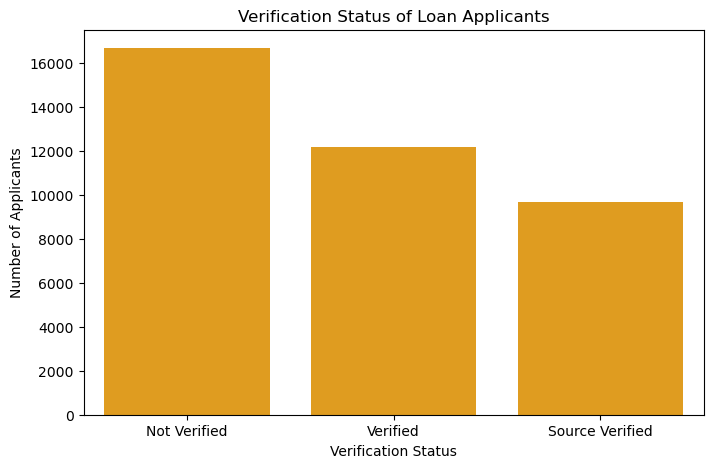

In [36]:
# Plot the bar chart for Verification Status of Loan Applicants 
plt.figure(figsize=(8, 5))
sb.barplot(x=verification_status.index, y=verification_status.values,color='orange')
plt.title("Verification Status of Loan Applicants")
plt.xlabel("Verification Status")
plt.ylabel("Number of Applicants")
plt.show()

The bar plot shows the trend of applicant verification status. Not Verified is highest no. of applicants.

In [37]:
# Calculating the median of loan amount
df_loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

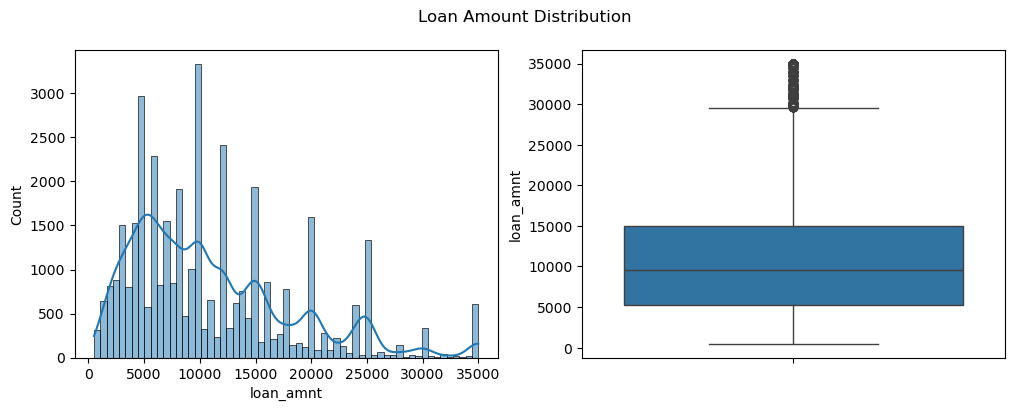

In [38]:
#Showing same using Box plot 
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sb.histplot(df_loan['loan_amnt'], kde=True)
plt.subplot(1,2,2)
sb.boxplot(data=df_loan.loan_amnt)
plt.suptitle('Loan Amount Distribution')
plt.show()

Above plot shows the median loan amount is near around 10000 which is similar with calculation that we have done earlier(Median Loan Amount: 9600.0). The loan amount varies from 0 to 35,000 and 25% is 5000, 50% is nearly equal to 10000 and 75% is 15000 and the outliers is above 30000

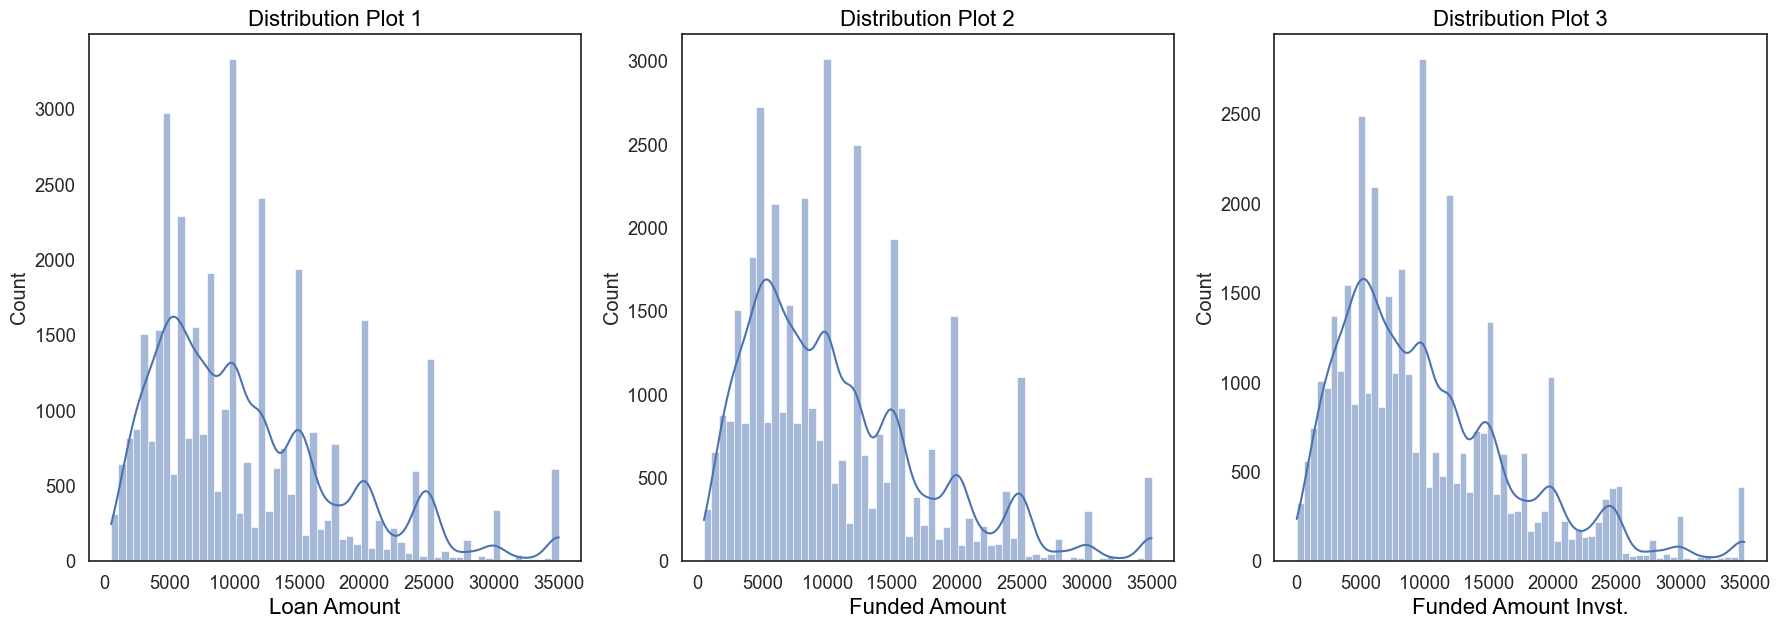

In [39]:
# Univariate Analysis - Quantitative Variables.
sb.set(font_scale=1.2)
plt.figure(figsize=(18, 12), facecolor='white')
sb.set_style("white")

# Plotting Graph loan count by loan_amnt
plt.subplot(2, 3, 1)
ax = sb.histplot(df_loan['loan_amnt'], kde=True)
ax.set_title('Distribution Plot 1', fontsize=16, color='BLACK')
ax.set_xlabel('Loan Amount', fontsize=16, color='black')

# Plotting Graph loan count by funded_amnt
plt.subplot(2, 3, 2)
ax = sb.histplot(df_loan['funded_amnt'], kde=True)
ax.set_title('Distribution Plot 2', fontsize=16, color='black')
ax.set_xlabel('Funded Amount', fontsize=16, color='black')

# Plotting Graph loan count by funded_amnt_inv
plt.subplot(2, 3, 3)
ax = sb.histplot(df_loan['funded_amnt_inv'], kde=True)
ax.set_title('Distribution Plot 3', fontsize=16, color='black')
ax.set_xlabel('Funded Amount Invst.', fontsize=16, color='black')

plt.tight_layout()
plt.show()


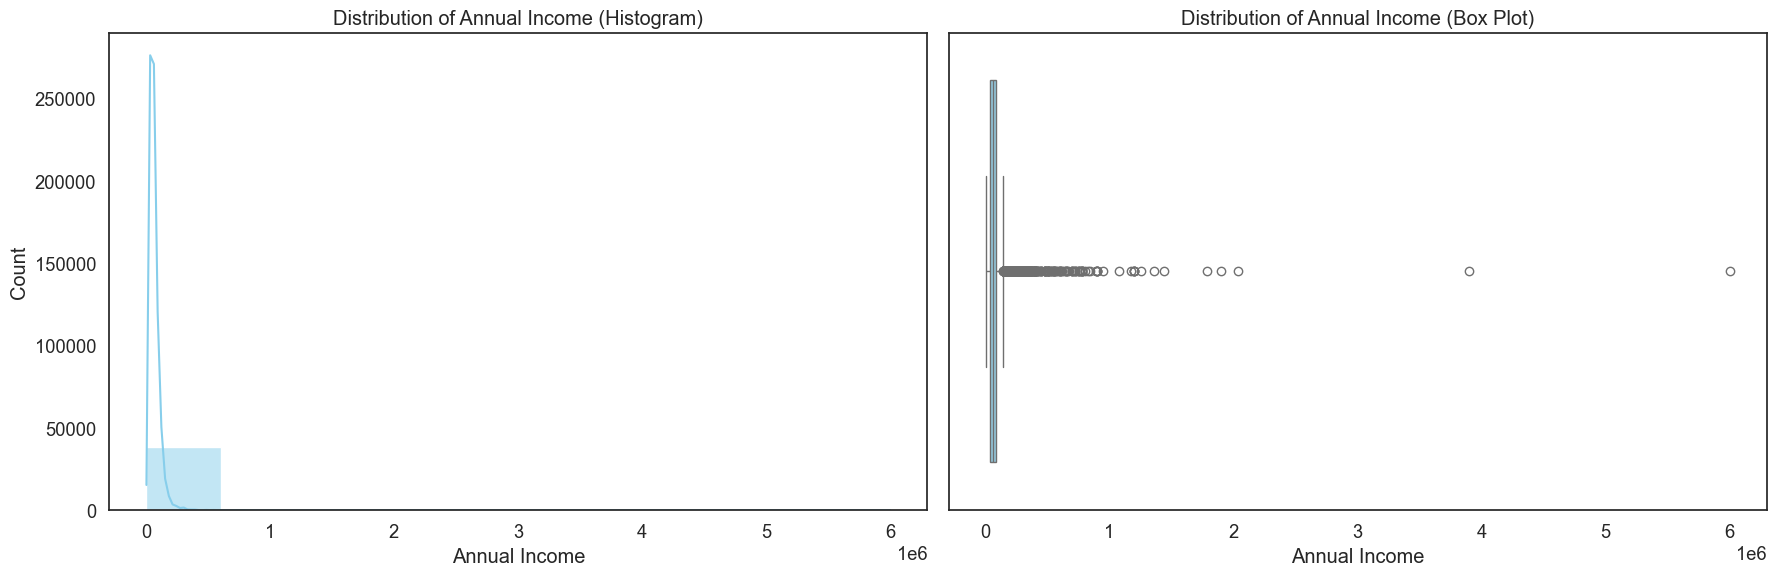

In [40]:
# Create a figure and subplots for Annual Income
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the layout (1 row, 2 columns)

# Histogram with KDE plot on the first subplot
sb.histplot(df_loan['annual_inc'], bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].set_xlabel('Annual Income')
axes[0].set_title('Distribution of Annual Income (Histogram)')

# Box plot on the second subplot
sb.boxplot(x='annual_inc', data=df_loan, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Annual Income')
axes[1].set_title('Distribution of Annual Income (Box Plot)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Subplot 1(Histogram): The distribution is highly right-skewed, with most data points concentrated at lower income levels. 

Subplot 2(Box Plot): Only 5 applicants have higher income than 1.5

**Summerizing all the graphs for univariate analysis**
1. Number of Applicants Year-wise: The graph shows increasing heights of the bars from 2007 to 2011
2. Count of Loan Purposes: Major Purposes are debt_consolidation, credit_card, other, home_improvement, major_purchase and so on.
3. Count of Loan by Grade wise: Grade (B,C,A) have most number of loans.
4. Counts of loan by Sub-Grade Wise:  SubGrade (A4,B3,A5,B5,B4) have most number of loans.
5. Verification Status of Loan Applicants: Not Verifified is highest no. of applicants.
6. Loan Amount Distribution: The loan amount varies from 0 to 35,000 and 25% is 5000, 50% is nearly equal to 10000 and 75% is 15000 and the outliers is above 30000.
7. Distribution Plot of 3 different attributes - Loan Amount, Funded Amount, Funded Amount Invst.: This 3 graph shows the distribution as the outliers is above 30000, 25% is 5000, 50% is nearly equal to 10000 and 75% is 15000.
8. Distribution of Annual Income - 2different Histogram and Box Plot: The distribution is highly right-skewed, with most data points concentrated at lower income levels.

**Segmented univariate analysis**

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

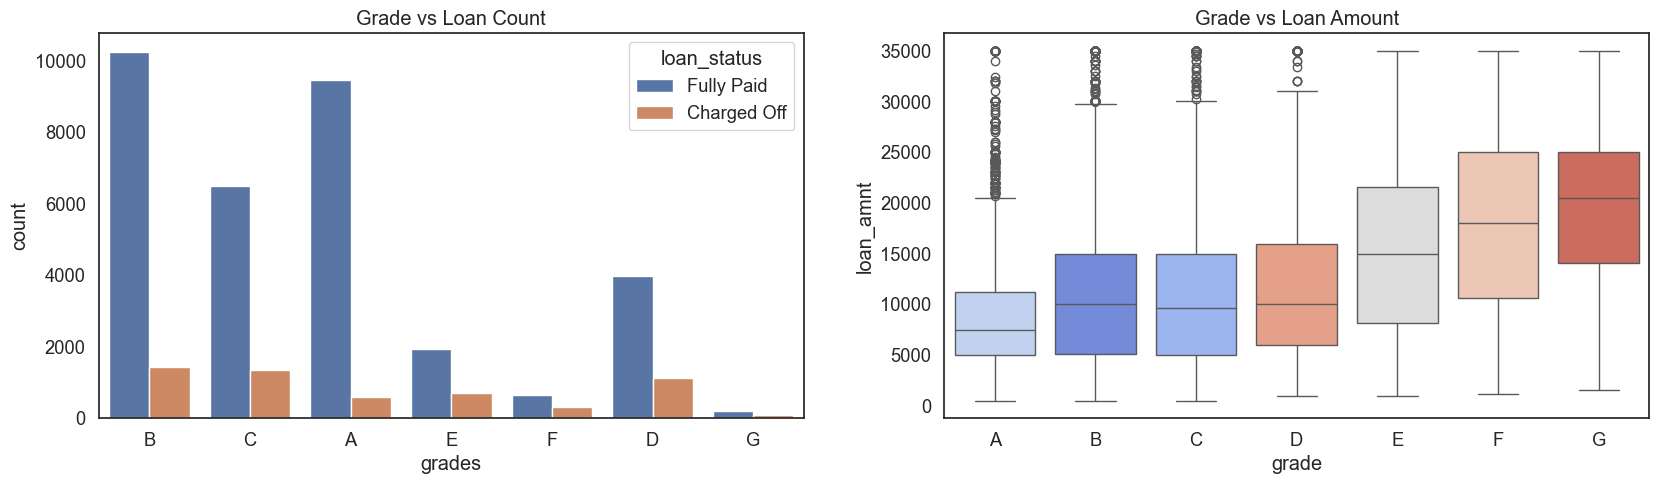

In [41]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.title('Grade vs Loan Count')
sb.countplot( x="grade", hue='loan_status', data=df_loan)
plt.xlabel('grades')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
grade_ord=df_loan.grade.unique()
grade_ord.sort()
sb.boxplot(x='grade',y=df_loan.loan_amnt,data=df_loan,order=grade_ord,palette='coolwarm',hue='grade')


Grades B and C have taken the most loans, while Grades F and G have taken loans with the highest amounts.

Text(0, 0.5, 'Loan Amount Data')

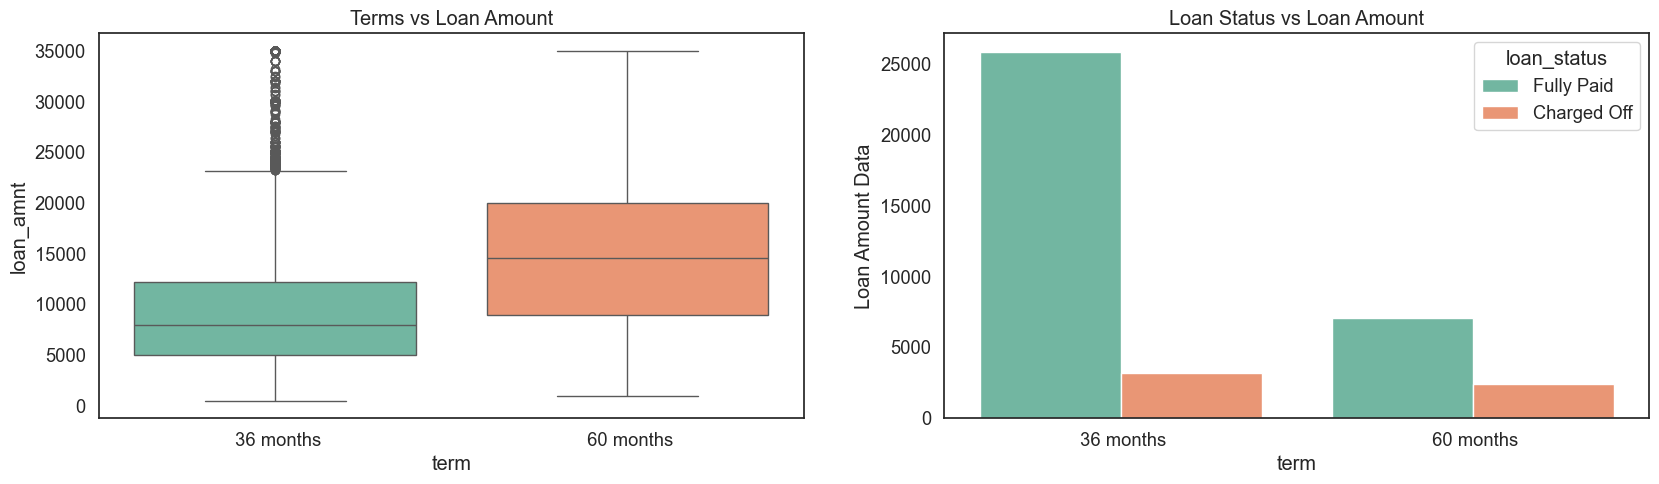

In [42]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
sb.boxplot(x='term',y=df_loan.loan_amnt,data=df_loan,palette='Set2',hue='term')
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Loan Status vs Loan Amount')
sb.countplot( x='term', data=df_loan, palette='Set2', hue='loan_status')
plt.ylabel('Loan Amount Data')

Loan Term vs Amount: 36-month loans have lower loan amounts with a narrower range, while 60-month loans show higher amounts with a broader distribution.

Loan Status vs Amount: 36-month loans have significantly more "Fully Paid" loans, whereas 60-month loans have a higher proportion of defaults ("Charged Off").

Text(0, 0.5, 'Loan Amount Data')

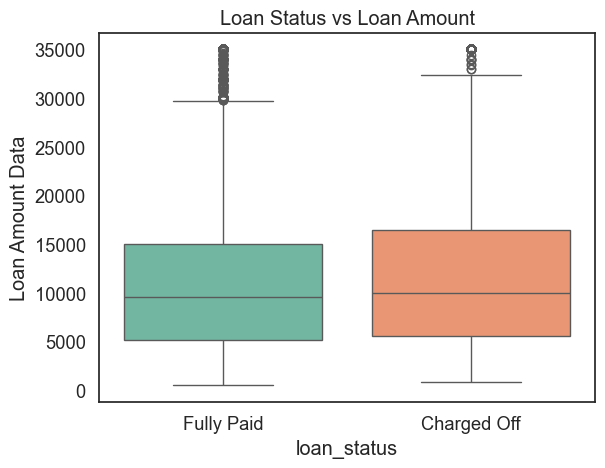

In [43]:
plt.title('Loan Status vs Loan Amount')
sb.boxplot( y="loan_amnt", x='loan_status', data=df_loan, palette='Set2', hue='loan_status')
plt.ylabel('Loan Amount Data')

For fully paid loans, outliers go above 30,000, while for charged-off loans, they go above 32,000. We can also see that most loans are for a term of 36 months.

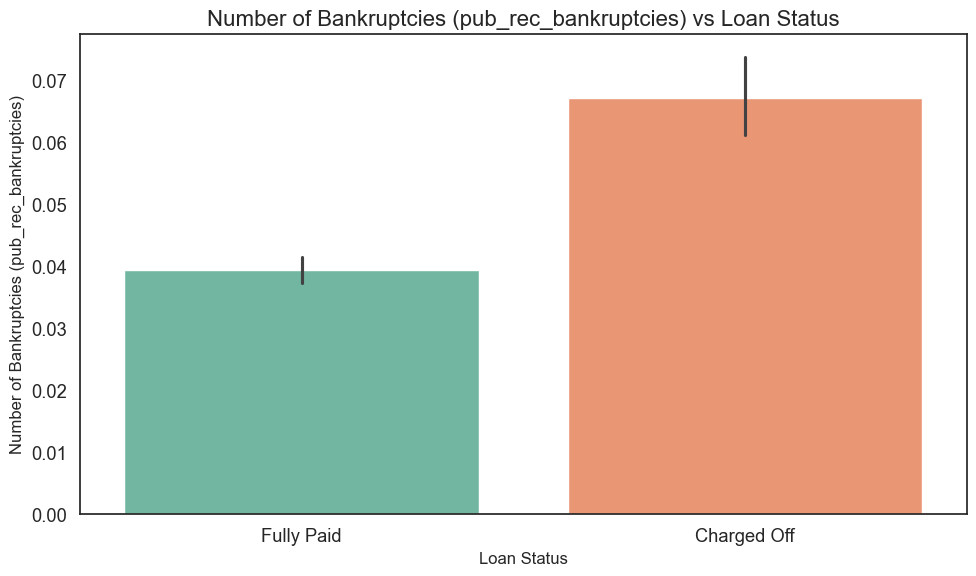

In [44]:
plt.figure(figsize=(10, 6))
sb.barplot(x='loan_status', y='pub_rec_bankruptcies', data=df_loan, palette='Set2', hue='loan_status')
plt.title('Number of Bankruptcies (pub_rec_bankruptcies) vs Loan Status', fontsize=16)
plt.ylabel('Number of Bankruptcies (pub_rec_bankruptcies)', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.tight_layout()
plt.show()

In Above graph, it shows that higher the number of public bankruptcy records thus higher chances of defaulting the loan

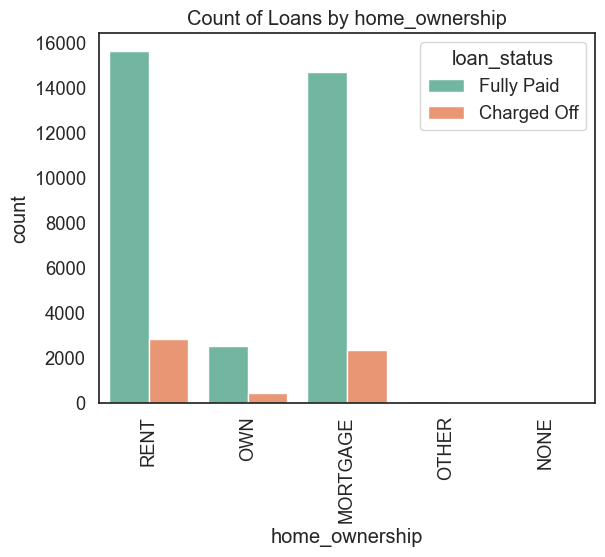

In [45]:
plt.title('Count of Loans by home_ownership')
sb.countplot(x='home_ownership',hue='loan_status', data=df_loan,palette='Set2')
plt.xticks(rotation=90)
plt.show()

People with rented or mortgaged homes are taking out more loans.

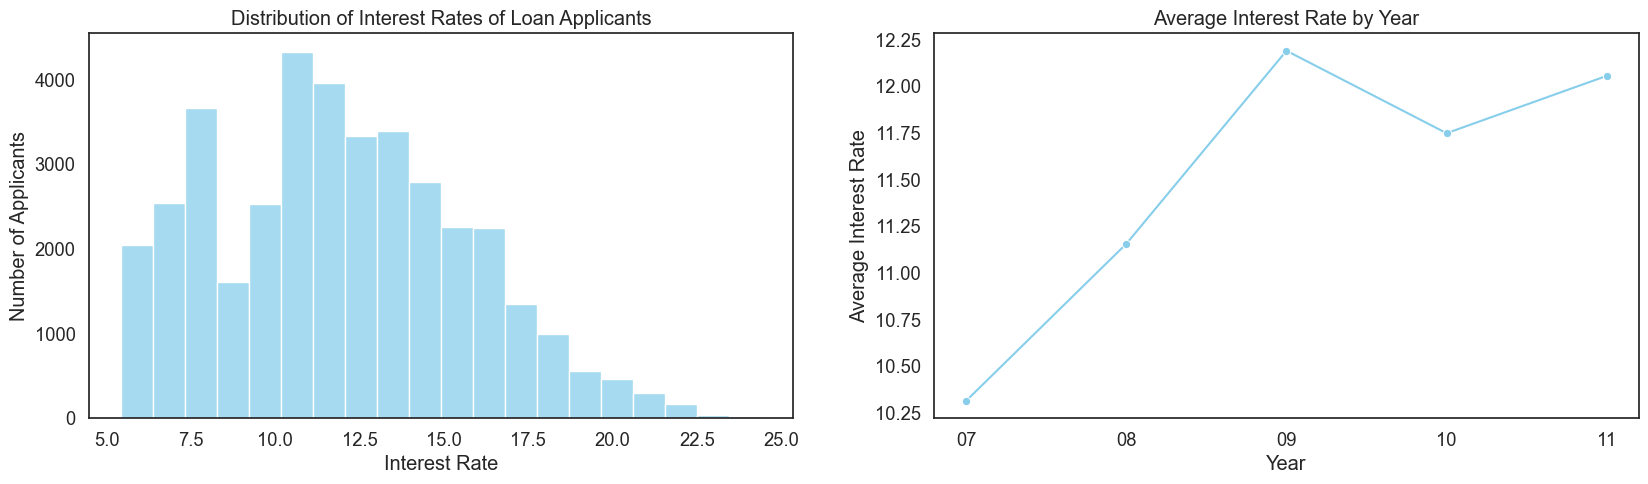

In [46]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
sb.histplot(df_loan['int_rate'], bins=20, color='skyblue')
plt.title("Distribution of Interest Rates of Loan Applicants")
plt.xlabel("Interest Rate")
plt.ylabel("Number of Applicants")
plt.subplot(122)
# Calculate average interest rate per year
avg_int_rate_by_year = df_loan.groupby('year')['int_rate'].mean().reset_index()
# Plotting the average interest rate per year
sb.lineplot(x='year', y='int_rate', data=avg_int_rate_by_year, marker='o', color='skyblue')
plt.title("Average Interest Rate by Year")
plt.xlabel("Year")
plt.ylabel("Average Interest Rate")
plt.show()

"Average Interest Rate by Year"-  Analysis of interest rate by year is higher from 2007 to 2009. In 2010, interest rate is decrease and increased in 2011.

"Distribution of Interest Rates of Loan Applicants" – This indicates that the plot displays how frequently different interest rates occur among the applicants. The most common interest rate are range from 10-15%.

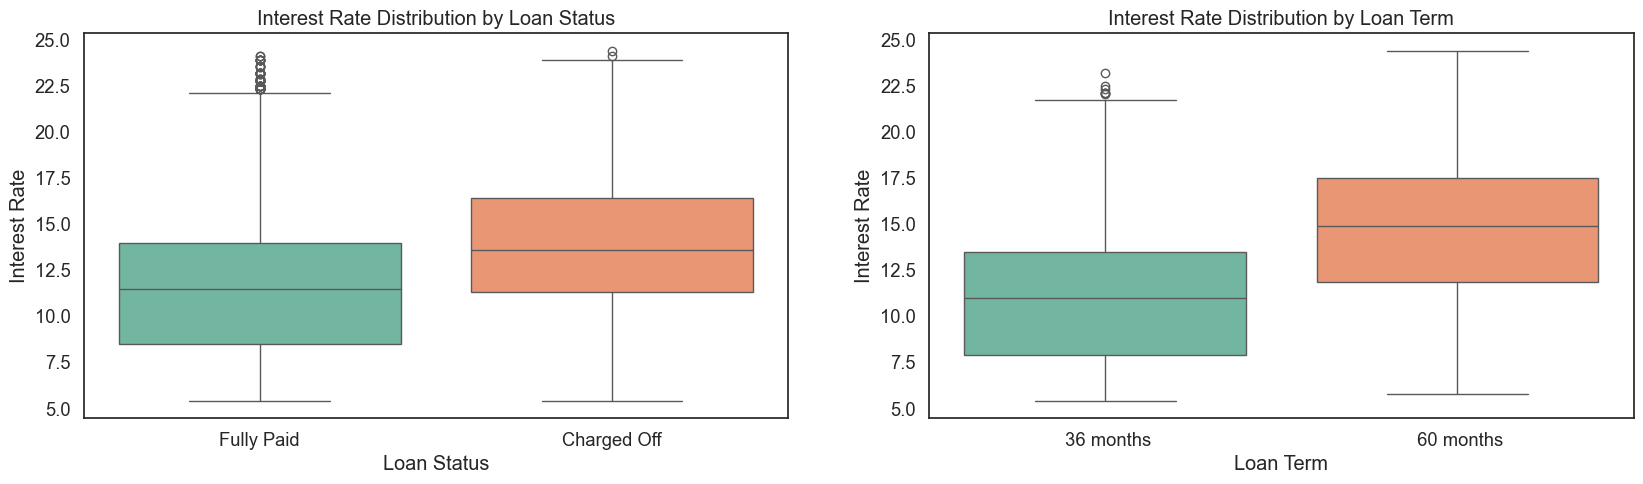

In [47]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
sb.boxplot(x='loan_status', y='int_rate', data=df_loan, palette='Set2',hue='loan_status')
plt.title("Interest Rate Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.subplot(122)
sb.boxplot(x='term', y='int_rate', data=df_loan, palette='Set2',hue='term')
plt.title("Interest Rate Distribution by Loan Term")
plt.xlabel("Loan Term")
plt.ylabel("Interest Rate")
plt.show()

"Interest Rate Distribution by Loan Status" – The plot is how interest rates differ across various loan statuses (e.g., Fully Paid, Charged Off). Charged-off(Defaulted) loan has highest interest rate.

"Interest Rate Distribution by Loan Term" – The plot shows how interest rates vary for different loan terms (e.g., 36 months, 60 months). Interest rate is high in 60month tenure.


In [48]:
# Calculate the value counts for 'term'
term_counts = df_loan['term'].value_counts()
print(term_counts)

term
36 months    29096
60 months     9481
Name: count, dtype: int64


**Bivariate Analysis**

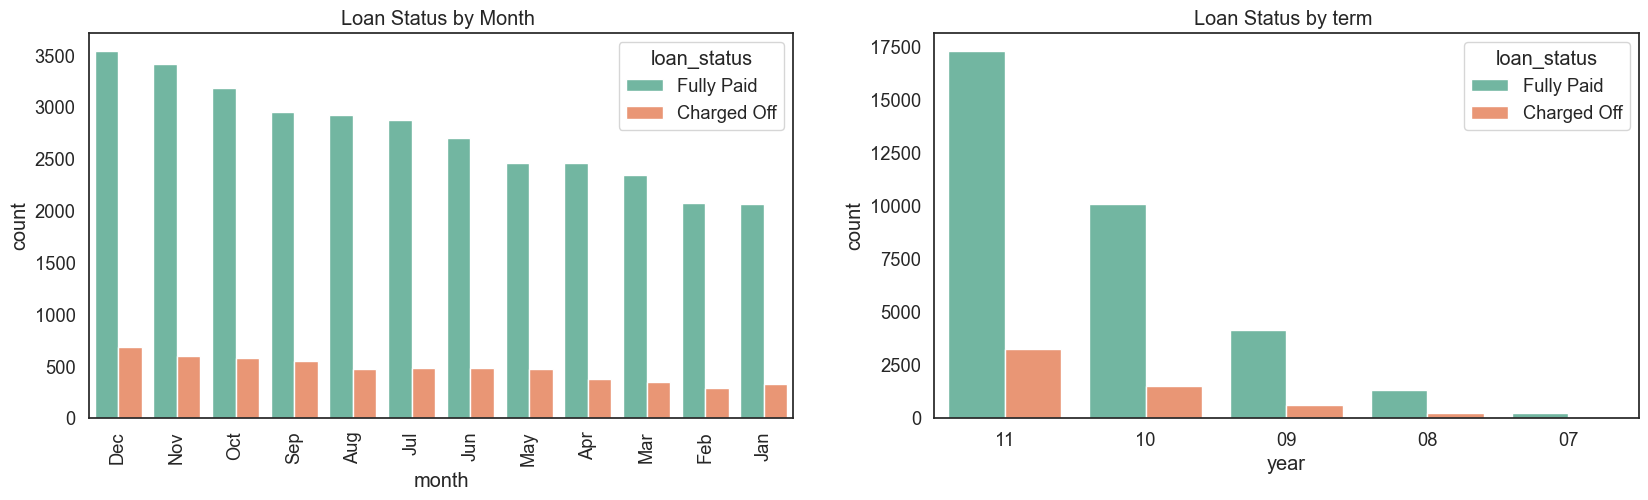

In [49]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
sb.countplot(x='month',hue='loan_status', data=df_loan,palette='Set2')
plt.xticks(rotation=90)
plt.title('Loan Status by Month ')
plt.subplot(122)
# Plot the bar chart for loan_status by term 
sb.countplot(x='year', hue='loan_status', data=df_loan, palette='Set2')
plt.title('Loan Status by term ')
plt.show()

Graph1: The highest number of loan applications occurs in December Month for every year. 

Graph2: The number of loan applicants has significantly increased each year.

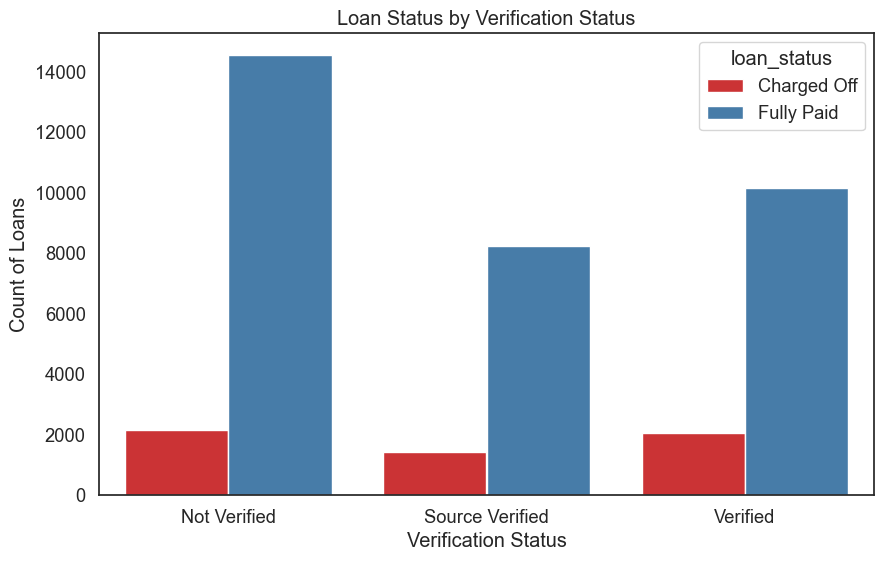

In [50]:
verification_status_counts = df_loan.groupby(['verification_status', 'loan_status']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sb.barplot(x='verification_status', y='count', hue='loan_status', data=verification_status_counts, palette='Set1')
plt.title('Loan Status by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count of Loans')
plt.show()

From this Graph we can say that Non-verified are highest in both fully paid and charged off loan applicants

In [51]:
status_by_year = df_loan.groupby(['year', 'loan_status']).size().unstack()
status_by_year.columns = ['Charged Off Count', 'Fully Paid Count']
print(status_by_year)

      Charged Off Count  Fully Paid Count
year                                     
07                   45               206
08                  247              1315
09                  594              4122
10                 1485             10047
11                 3256             17260


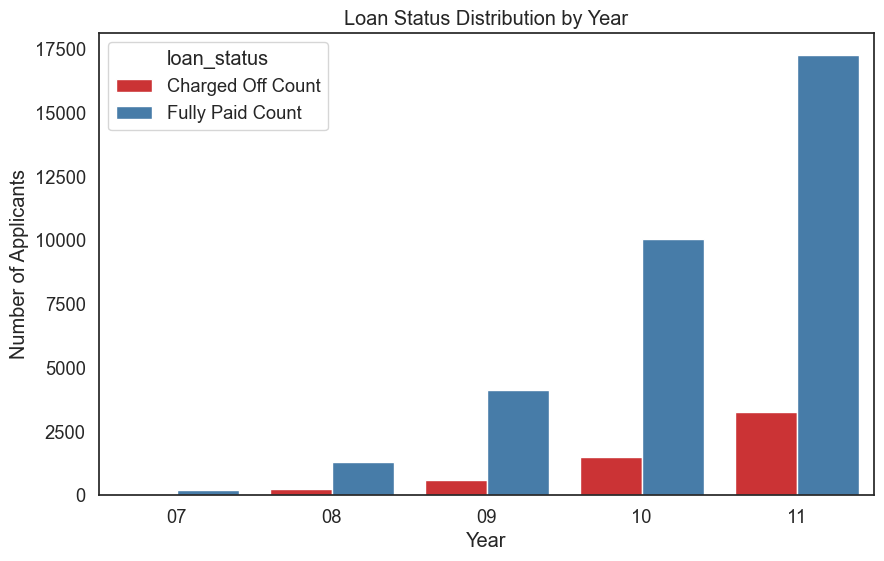

In [56]:
status_by_year = status_by_year.reset_index().melt(id_vars='year', var_name='loan_status', value_name='count')
plt.figure(figsize=(10, 6))
sb.barplot(x='year', y='count', hue='loan_status', data=status_by_year, palette='Set1')
plt.title('Loan Status Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Applicants')
plt.show()

From above analysis, we can simply identify that In 2011, no. of fully paid loan applicants is highest.


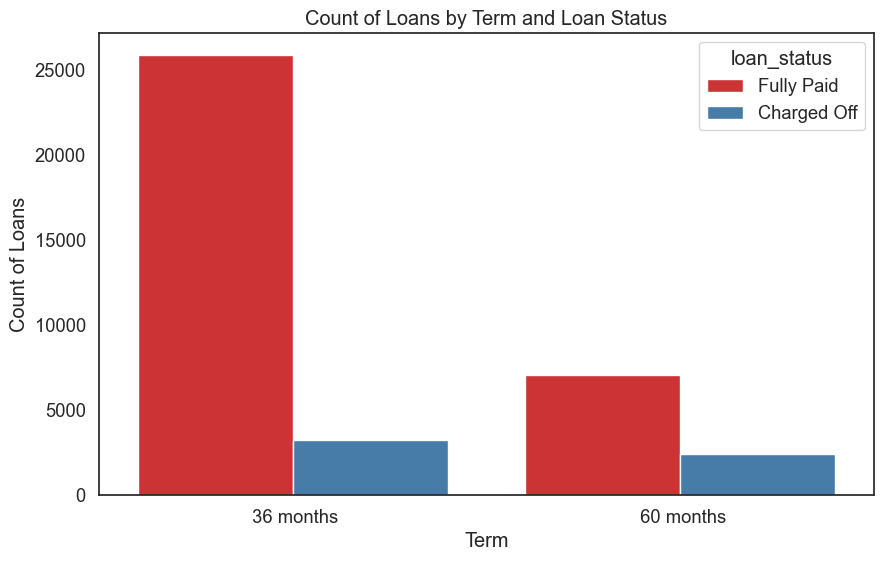

In [52]:
df_loan_counts = df_loan.groupby(['term', 'loan_status'], as_index=False)['id'].count()
loan_status_order = ['Fully Paid', 'Charged Off']
plt.figure(figsize=(10, 6))
sb.barplot(x='term', y='id', hue='loan_status', data=df_loan_counts, hue_order=loan_status_order, palette="Set1")
plt.title('Count of Loans by Term and Loan Status')
plt.xlabel('Term')
plt.ylabel('Count of Loans')
plt.show()

The bar chart shows the count of loans by terms and their loan status. It is eventually identifies that fully paid loans covered in 36month term.

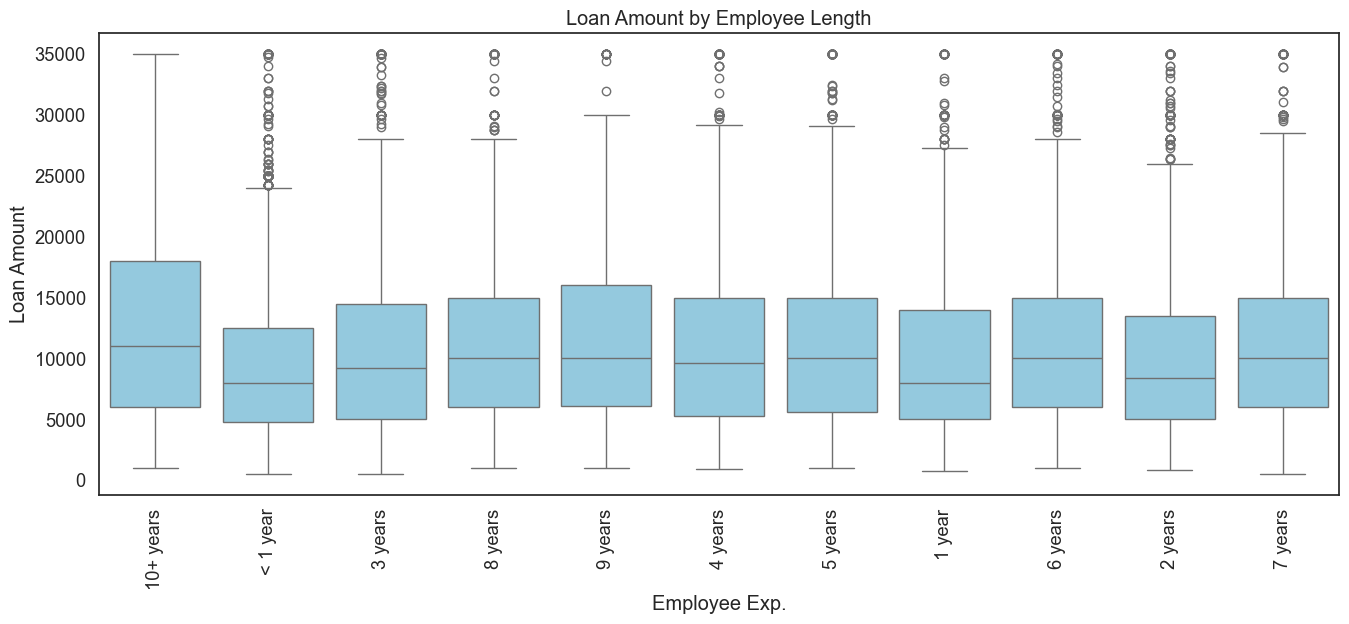

In [53]:
plt.figure(figsize=(16, 6))
ax = sb.boxplot(x='emp_length', y='loan_amnt', data=df_loan, color='skyblue')
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount', title='Loan Amount by Employee Length')
plt.xticks(rotation=90) 
plt.show()

The box plot shows the loan amount by Employee year of experience. The 50% is range from 7000 to 12000 for every emp_length(Exployee Exp.). 
There is slight diversion in loan amount for every emp_length. There are maximum outliers are present in less than 1 year.

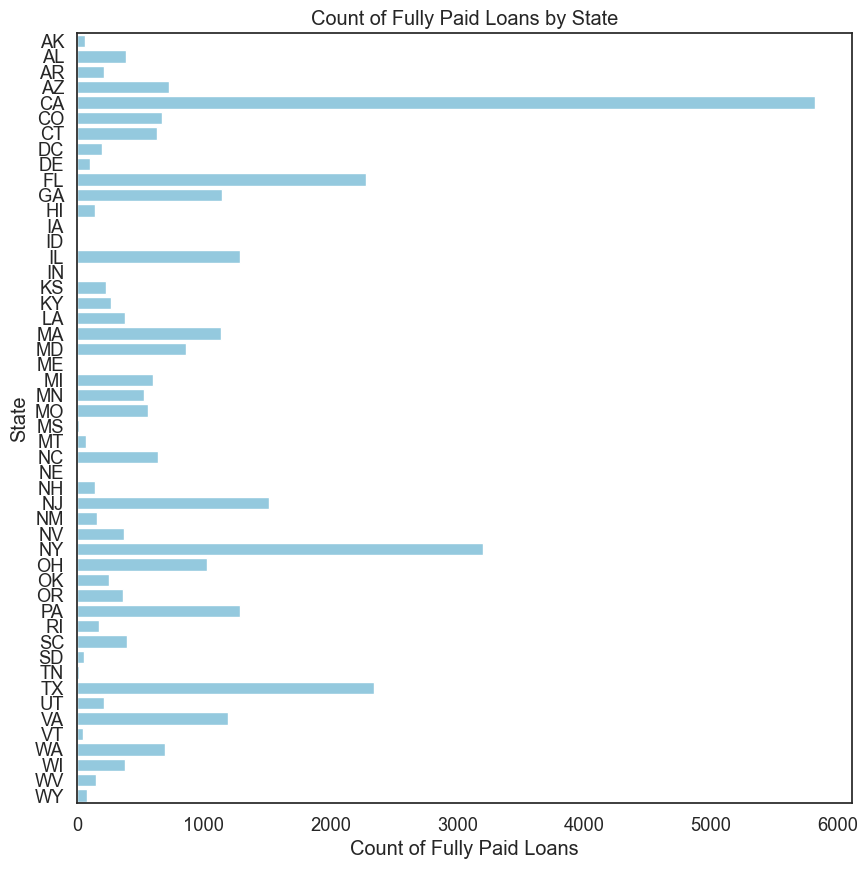

In [54]:
# Grouping the data and counting loan statuses for 'Fully Paid' loans
loan_status_count = df_loan[df_loan['loan_status'] == 'Fully Paid'] \
    .groupby('addr_state')['loan_status'].count() \
    .reset_index()

# Creating the bar plot and Setting the labels and title
plt.figure(figsize=(10, 10))
sb.barplot(x='loan_status', y='addr_state', data=loan_status_count, color='skyblue')
plt.xlabel('Count of Fully Paid Loans')
plt.ylabel('State')
plt.title('Count of Fully Paid Loans by State')
plt.show()

CA state has highest number of fully paid loans. Second highest state is NY.

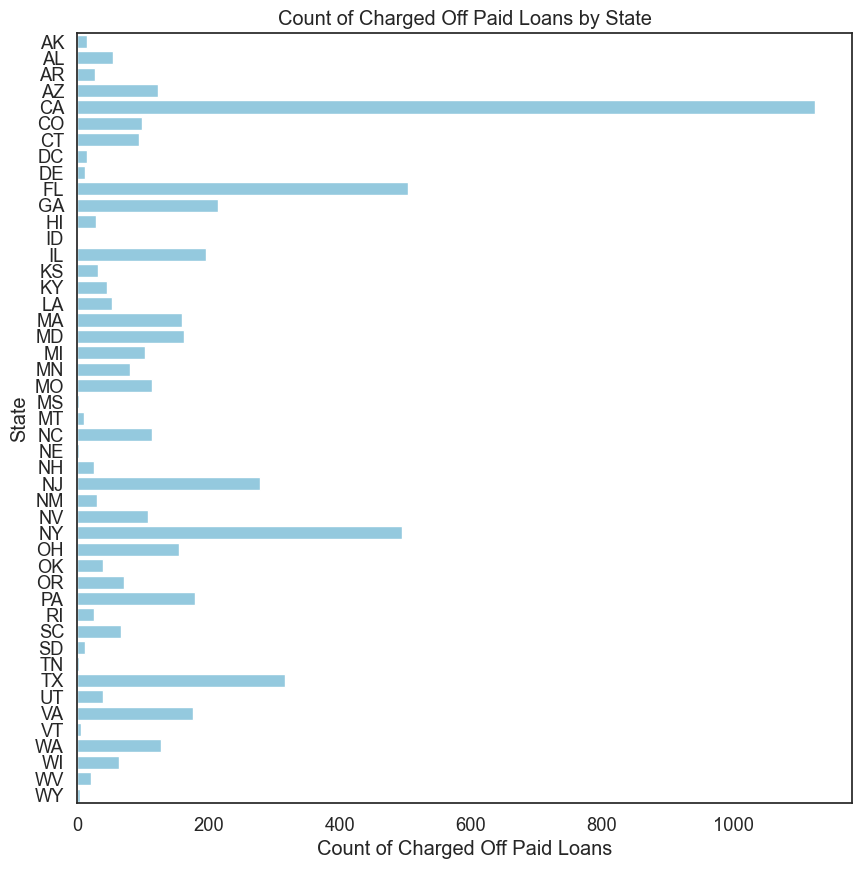

In [63]:
# Grouping the data and counting loan statuses for 'Charged Off' loans
loan_status_count = df_loan[df_loan['loan_status'] == 'Charged Off'] \
    .groupby('addr_state')['loan_status'].count() \
    .reset_index()

# Creating the bar plot and Setting the labels and title
plt.figure(figsize=(10, 10))
sb.barplot(x='loan_status', y='addr_state', data=loan_status_count, color='skyblue')
plt.xlabel('Count of Charged Off Paid Loans')
plt.ylabel('State')
plt.title('Count of Charged Off Paid Loans by State')
plt.show()

CA state has highest number of Charged Off paid loans. Second highest state is FL.

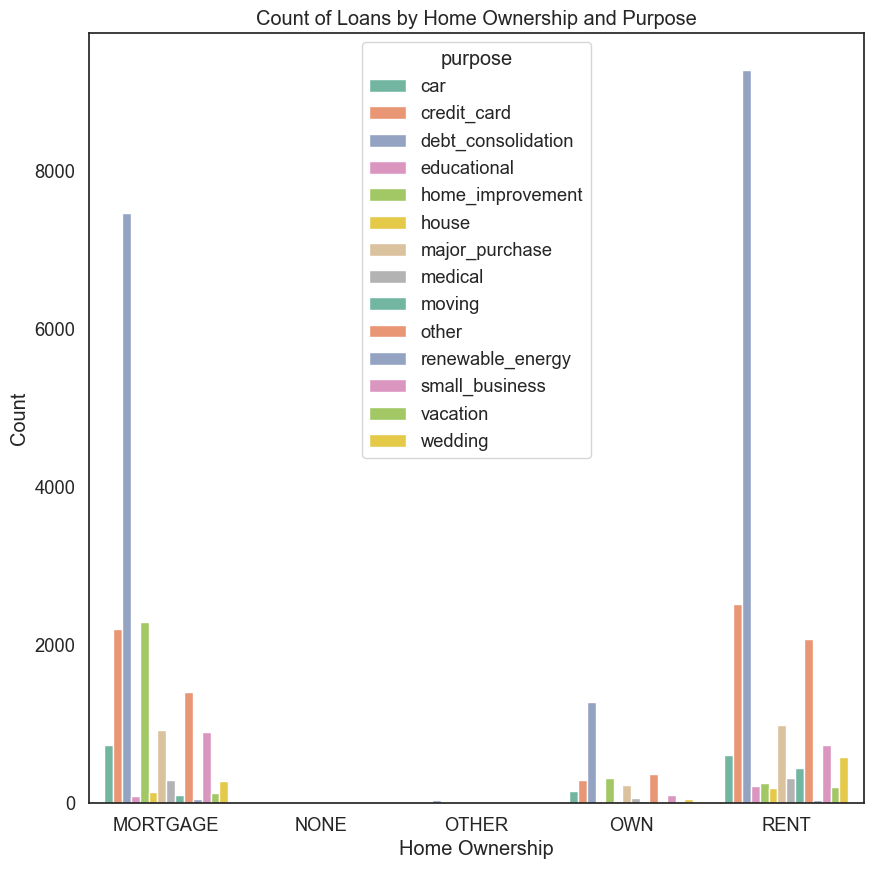

In [64]:
home_ownership_purpose_count = df_loan.groupby(['home_ownership', 'purpose']).size().reset_index(name='count')

plt.figure(figsize=(10, 10))
sb.barplot(x='home_ownership', y='count', hue='purpose', data=home_ownership_purpose_count, palette='Set2')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Count of Loans by Home Ownership and Purpose')
plt.show()

The bar graph shows the home ownership by loan counts. It is identifies that Rent and Mortage home owners takes most of loans in debt_consolidation and for credit car.

**Summerizing the all the graphs comes under segmentes univariate and bivariate analysis:**
1. Grade vs Loan Count and Grade vs Loan Amount: Most fully paid and charged-off loans fall into the preferred grades B, A, and C. Grades B and C have taken the most loans, while Grades F and G have taken loans with the highest amounts.
2. Loan Status vs Loan Amount and Terms vs Loan Amount: The average loan amount is almost the same for both fully paid and charged-off loans, but there are more extreme values. For fully paid loans, outliers go above 30,000, while for charged-off loans, they go above 32,000. Higher amount loans have high tenure i.e. 60 months.
3. Number of Bankruptcies (pub_rec_bankruptcies): Graph shows Higher the number of public bankruptcy records thus higher chances of defaulting the loan
4. Count of Loans by home_ownership: People with rented or mortgaged homes are taking out more loans.
5. Distribution of Interest Rates of Loan Applicants: The analysis shows that interest rates were higher from 2007 to 2009. In 2010, rates decreased but then rose again in 2011. This indicates variations in interest rates over time, with the most common rates falling between 10-15%.
6. Interest Rate Distribution with Loan_status and term: The plot shows how interest rates differ across various loan statuses, like Fully Paid and Charged Off. Charged-off(Defaulted) loan has highest interest rate. Interest rate is high in 60month tenure.
7. Loan Status by Month and term: The highest number of loan applications is always in December each year, and the number of applicants has grown significantly every year.
8. Loan Status by Verification Status: Non-verified are highest in both fully paid and charged off loan applicants
9. Loan Status Distribution by Year: The analysis shows that the highest number of fully paid loan applicants was in 2011.
10. Count of Loans by Term and Loan Status: The bar chart shows the number of loans by term and loan status. It clearly shows that most fully paid loans are for the 36-month term.
11. Loan Amount by Employee Length: For every experience level, 50% of loan amounts range from 7,000 to 12,000. There is a slight variation in loan amounts across experience levels, and most outliers appear in employees with less than 1 year of experience.
12. Count of Fully Paid Loans by State: CA state has highest number of fully paid loans. NY is 2nd highest of fully paid loans.
13. Count of Charged Off Paid Loans: CA state has highest number of Charged Off paid loans. Second highest state is FL.
14. Count of Loans by Home Ownership and Purpose: It is found that homeowners who rent or have a mortgage take out the most loans for debt consolidation and credit cards.

**Performing analysis for Defaulters**

In [65]:
#Let's create a separate dataframe of defaulters -> Charged Off
df_defaulters=df_loan.loc[df_loan['loan_status']=='Charged Off']
df_defaulters.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,month
1,1077430,2500,2500,2500.0,60 months,15.27,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,Apr-99,5,3,0,1687,9.40%,4,f,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
8,1071795,5600,5600,5600.0,60 months,21.28,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,small_business,CA,5.55,Apr-04,2,11,0,5210,32.60%,13,f,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
9,1071570,5375,5375,5350.0,60 months,12.69,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,other,TX,18.08,Sep-04,0,2,0,9279,36.50%,3,f,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
12,1064687,9000,9000,9000.0,36 months,13.49,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,debt_consolidation,VA,10.08,Apr-04,1,4,0,10452,91.70%,9,f,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,Nov-12,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec
14,1069057,10000,10000,10000.0,36 months,10.65,B,B2,SFMTA,3 years,RENT,100000.0,Source Verified,Dec-11,Charged Off,n,other,CA,7.06,May-91,2,14,0,11997,55.50%,29,f,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-13,325.74,Mar-14,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0,11,Dec


In [66]:
# Calculate counts of defaulters for each grade category
defaulter_counts_grade = df_loan[df_loan['loan_status'] == 'Charged Off']['grade'].value_counts()
total_counts_grade = df_loan['grade'].value_counts()
defaulter_counts_grade = defaulter_counts_grade.reindex(total_counts_grade.index, fill_value=0)

grade_df = pd.DataFrame({
    'grade': total_counts_grade.index,
    'defaulter_perc': round((100 * defaulter_counts_grade / total_counts_grade), 2)
}).sort_values(by='defaulter_perc', ascending=False).reset_index(drop=True)

print(grade_df)

  grade  defaulter_perc
0     G           33.78
1     F           32.68
2     E           26.85
3     D           21.99
4     C           17.19
5     B           12.21
6     A            5.99


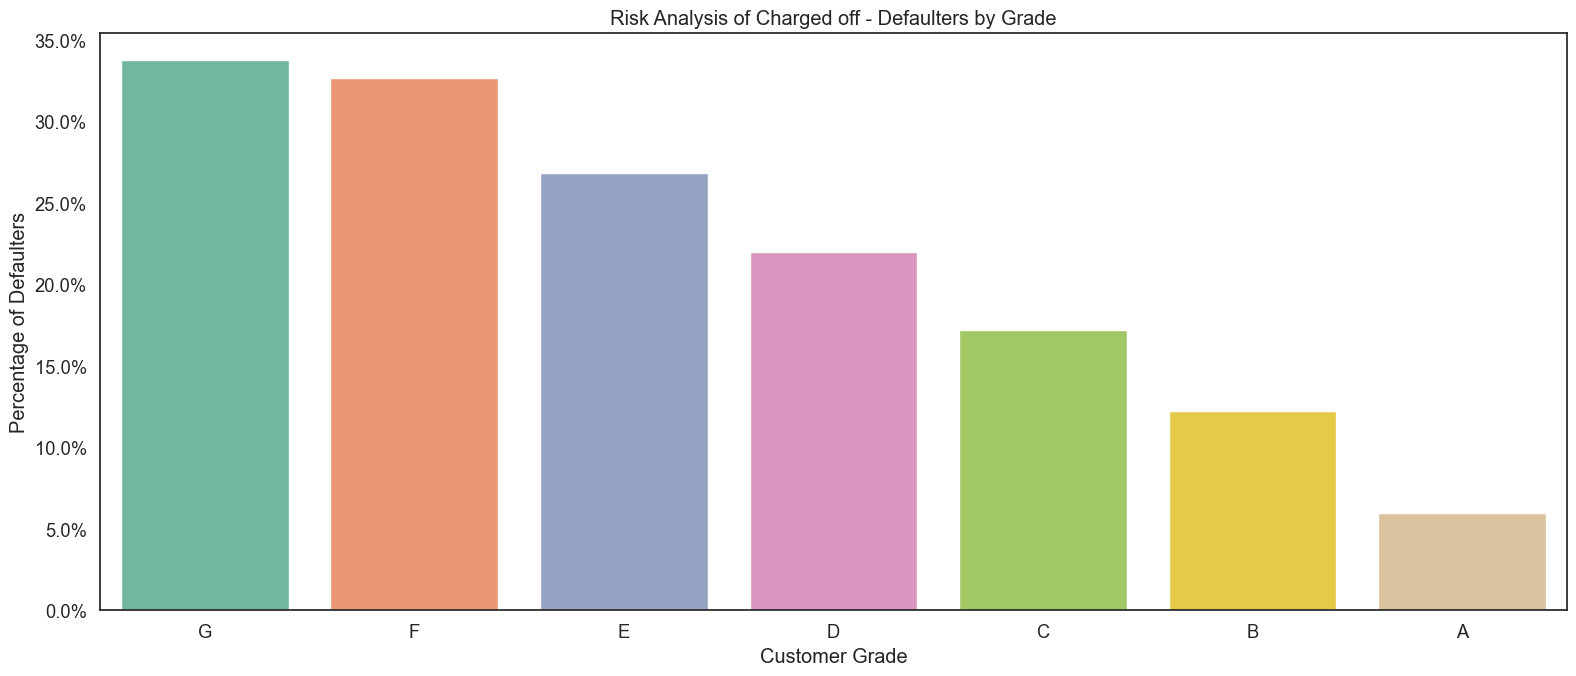

In [67]:
plt.figure(figsize=(16,7))
ax = sb.barplot(x='grade', y='defaulter_perc', data=grade_df, hue='grade', palette="Set2")
ax.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters', title='Risk Analysis of Charged off - Defaulters by Grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()



This bar chart shows the percentage of loan defaulters by Grade. Grade G has highest risk of defaulters.

In [68]:
# Calculate counts of defaulters for each purpose category
defaulter_counts_purpose = df_loan[df_loan['loan_status'] == 'Charged Off']['purpose'].value_counts()
total_counts_purpose = df_loan['purpose'].value_counts()
defaulter_counts_purpose = defaulter_counts_purpose.reindex(total_counts_purpose.index, fill_value=0)
df_purpose = pd.DataFrame({
    'purpose': total_counts_purpose.index,
    'defaulter_perc': round((100 * defaulter_counts_purpose / total_counts_purpose), 2)
}).sort_values(by='defaulter_perc', ascending=False).reset_index(drop=True)

print(df_purpose)

               purpose  defaulter_perc
0       small_business           27.08
1     renewable_energy           18.63
2          educational           17.23
3                other           16.38
4                house           16.08
5               moving           15.97
6              medical           15.57
7   debt_consolidation           15.33
8             vacation           14.13
9     home_improvement           12.07
10         credit_card           10.78
11                 car           10.67
12             wedding           10.37
13      major_purchase           10.33


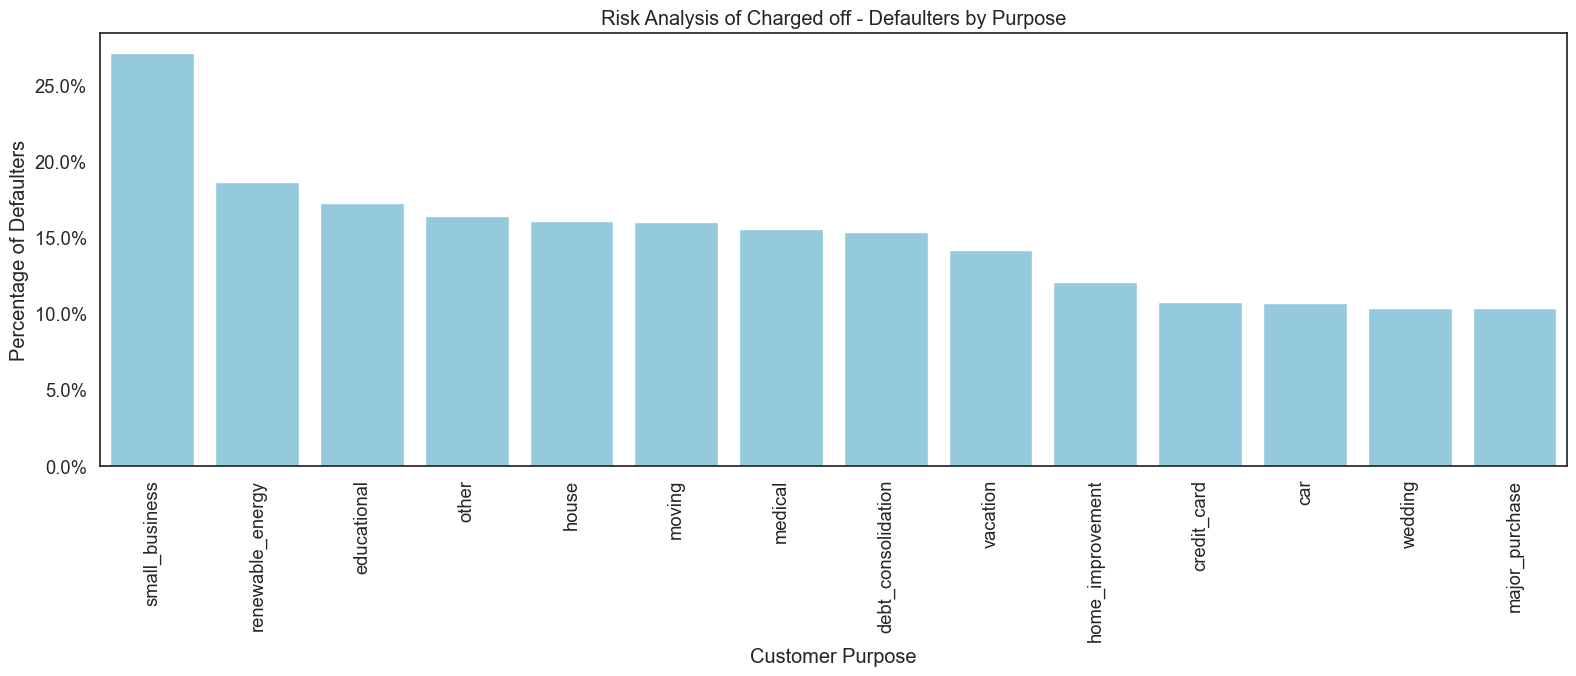

In [69]:
plt.figure(figsize=(16, 7))
ax = sb.barplot(x='purpose', y='defaulter_perc', data=df_purpose,color='skyblue')
ax.set(xlabel='Customer Purpose', ylabel='Percentage of Defaulters', title='Risk Analysis of Charged off - Defaulters by Purpose')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This bar chart shows the percentage of loan defaulters by loan purpose. Insights are -

1) High Default Rates for Small Businesses
   
3) Moderate Risk in Renewable Energy and Educational Loans
   
5) Lower Default Rates for Major Purchases, Weddings, and Cars

In [70]:
# Calculate counts of defaulters for each emp_length category
defaulter_counts_emp = df_loan[df_loan['loan_status'] == 'Charged Off']['emp_length'].value_counts()
total_counts_emp = df_loan['emp_length'].value_counts()
defaulter_counts_emp = defaulter_counts_emp.reindex(total_counts_emp.index, fill_value=0)
df_emp = pd.DataFrame({
    'emp_length': total_counts_emp.index,
    'defaulter_perc': round((100 * defaulter_counts_emp / total_counts_emp), 2)
}).sort_values(by='defaulter_perc', ascending=False).reset_index(drop=True)
print(df_emp)

   emp_length  defaulter_perc
0   10+ years           15.68
1     7 years           15.37
2      1 year           14.39
3     5 years           14.34
4    < 1 year           14.17
5     6 years           14.16
6     8 years           14.15
7     3 years           13.83
8     4 years           13.82
9     2 years           13.21
10    9 years           12.89


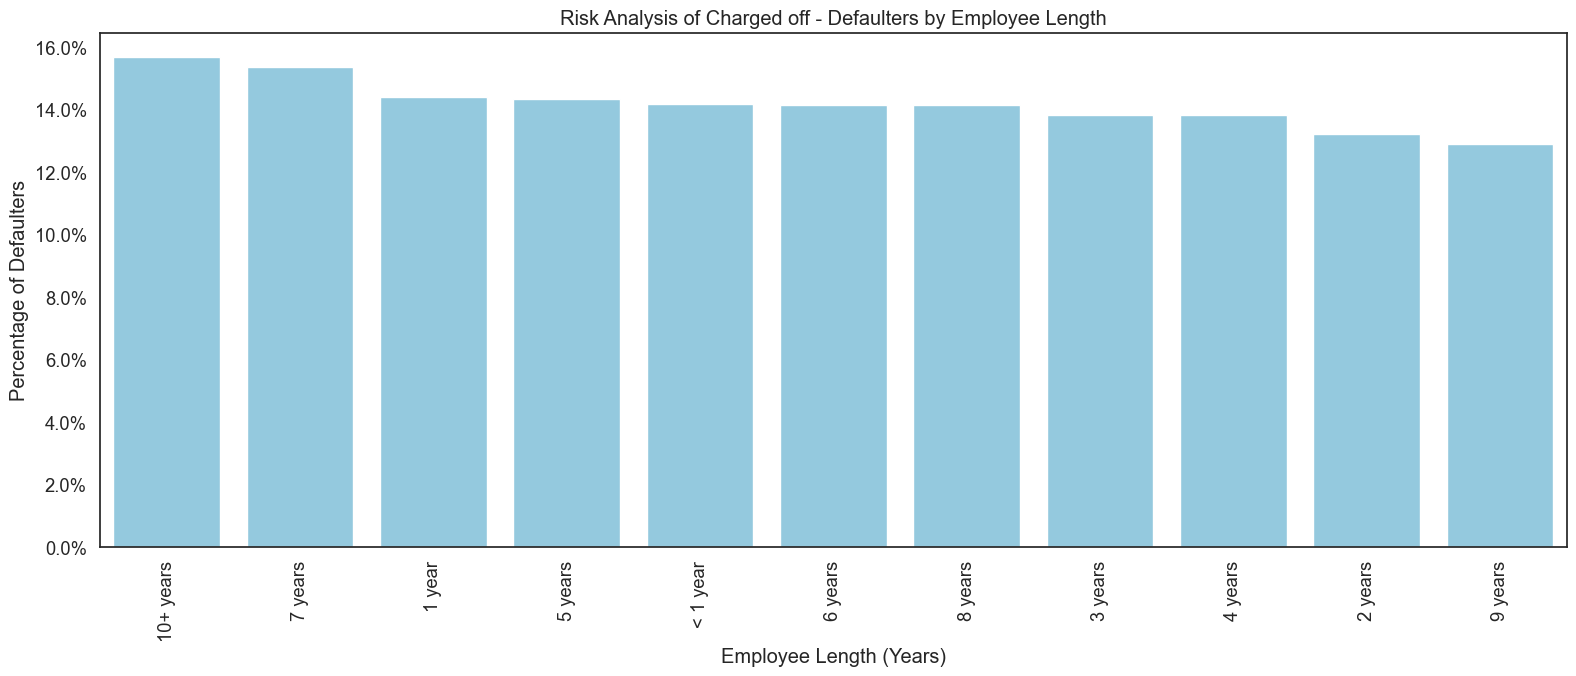

In [71]:
plt.figure(figsize=(16, 7))
ax = sb.barplot(x='emp_length', y='defaulter_perc', data=df_emp, color='skyblue')
ax.set(xlabel='Employee Length (Years)', ylabel='Percentage of Defaulters', title='Risk Analysis of Charged off - Defaulters by Employee Length')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())  # Format y-axis as percentage
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

This bar chart shows the percentage of loan defaulters based on the employment length of the applicants. Insights are -

1) Consistent Default Rates Across Employment Lengths: All categories ranging close to 15%
   
3) Slight Variation: This suggests that employment length does not strongly impact the likelihood of default.

In [72]:
# Calculate counts of defaulters for each interest rate category
defaulter_counts_rate = df_loan[df_loan['loan_status'] == 'Charged Off']['int_rate'].value_counts()
total_counts_rate = df_loan['int_rate'].value_counts()
defaulter_counts_rate = defaulter_counts_rate.reindex(total_counts_rate.index, fill_value=0)
df_rate = pd.DataFrame({
    'int_rate': total_counts_rate.index,
    'defaulter_perc': round((100 * defaulter_counts_rate / total_counts_rate), 2)
}).sort_values(by='defaulter_perc', ascending=False).reset_index(drop=True)

print(df_rate)

     int_rate  defaulter_perc
0       20.52           100.0
1       16.08           100.0
2       16.15           100.0
3       14.62           100.0
4       18.72           100.0
..        ...             ...
365     15.45             0.0
366     12.62             0.0
367     18.84             0.0
368     14.12             0.0
369     16.20             0.0

[370 rows x 2 columns]


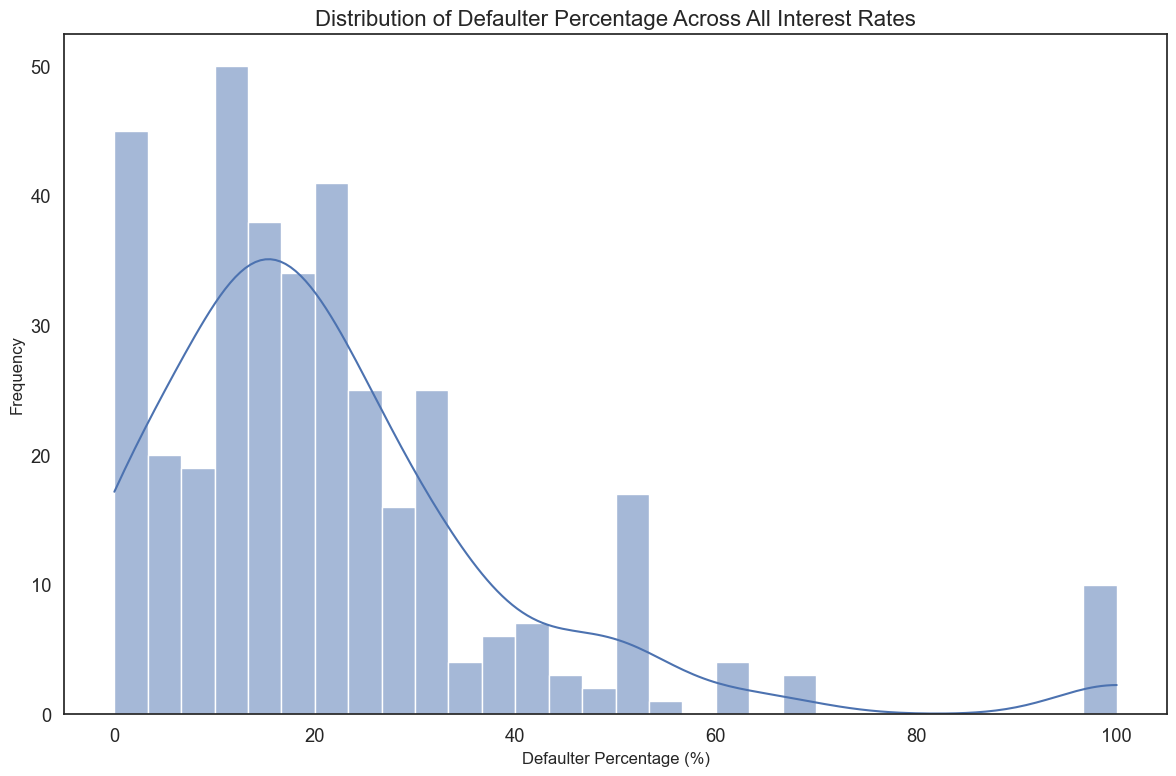

In [73]:
plt.figure(figsize=(12, 8))
sb.histplot(df_rate['defaulter_perc'], bins=30, kde=True)

plt.title('Distribution of Defaulter Percentage Across All Interest Rates', fontsize=16)
plt.xlabel('Defaulter Percentage (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

The graph is right-skewed, showing that the majority of defaulter percentages are concentrated at lower values, with fewer instances of high defaulter percentages.


In [74]:
# Calculate counts of defaulters for each sub-grade category
defaulter_counts_subgrade = df_loan[df_loan['loan_status'] == 'Charged Off']['sub_grade'].value_counts()
total_counts_subgrade = df_loan['sub_grade'].value_counts()
defaulter_counts_subgrade = defaulter_counts_subgrade.reindex(total_counts_subgrade.index, fill_value=0)

df_subgrade = pd.DataFrame({
    'subgrade': total_counts_subgrade.index,
    'defaulter_perc': round((100 * defaulter_counts_subgrade / total_counts_subgrade), 2)
}).sort_values(by='defaulter_perc', ascending=False).reset_index(drop=True)

print(df_subgrade)

   subgrade  defaulter_perc
0        F5           47.79
1        G3           42.22
2        G2           36.36
3        F4           35.10
4        G5           34.48
5        G1           32.98
6        F2           30.04
7        F1           29.84
8        E4           29.72
9        F3           29.31
10       E5           28.17
11       E1           27.42
12       E2           26.55
13       D5           25.06
14       G4           24.07
15       D4           23.42
16       E3           23.06
17       D3           22.94
18       D2           21.07
19       C3           18.15
20       C5           18.02
21       D1           17.94
22       C4           17.58
23       C2           16.62
24       C1           16.35
25       B5           13.61
26       B4           13.50
27       B3           12.07
28       B2           11.39
29       B1            9.52
30       A5            7.99
31       A4            6.20
32       A3            5.69
33       A2            4.91
34       A1         

/var/folders/cd/76l_616x6gg2gx989nn1m4q00000gq/T/ipykernel_19402/397472313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x='subgrade', y='defaulter_perc', data=df_subgrade, palette="Set2")


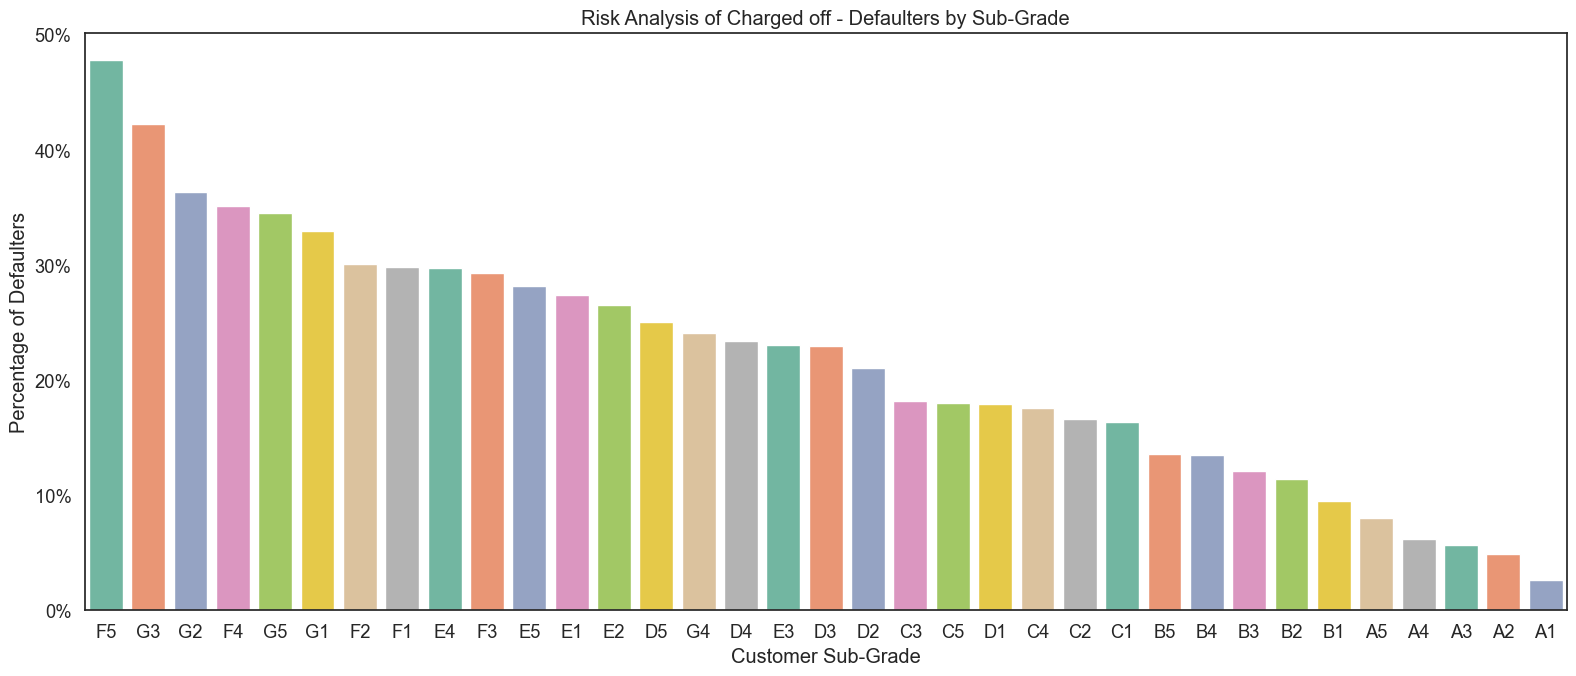

In [75]:
plt.figure(figsize=(16,7))
ax = sb.barplot(x='subgrade', y='defaulter_perc', data=df_subgrade, palette="Set2")
ax.set(xlabel='Customer Sub-Grade', ylabel='Percentage of Defaulters', title='Risk Analysis of Charged off - Defaulters by Sub-Grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()

SubGrade(F5,G3,G2) has highest risk of defaulters.

In [76]:
# Define bins for annual income
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, 300000, 500000, 1000000]
df_loan['income_bin'] = pd.cut(df_loan['annual_inc'], bins=income_bins)
# Calculate counts of defaulters for each annual_income category
defaulter_counts_income = df_loan[df_loan['loan_status'] == 'Charged Off']['income_bin'].value_counts()
total_counts_income = df_loan['income_bin'].value_counts()
defaulter_counts_income = defaulter_counts_income.reindex(total_counts_income.index, fill_value=0)
income_df = pd.DataFrame({
    'income_bin': total_counts_income.index,
    'defaulter_perc': round((100 * defaulter_counts_income / total_counts_income), 2)
}).sort_values(by='defaulter_perc', ascending=False).reset_index(drop=True)
print(income_df)


          income_bin  defaulter_perc
0  (500000, 1000000]           19.23
1         (0, 25000]           19.14
2     (25000, 50000]           16.55
3     (50000, 75000]           14.45
4    (75000, 100000]           12.19
5   (150000, 200000]           11.24
6   (100000, 150000]           10.74
7   (200000, 300000]            9.77
8   (300000, 500000]            9.52


/var/folders/cd/76l_616x6gg2gx989nn1m4q00000gq/T/ipykernel_19402/4003677598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='income_bin', y='defaulter_perc', data=income_df, palette='viridis')


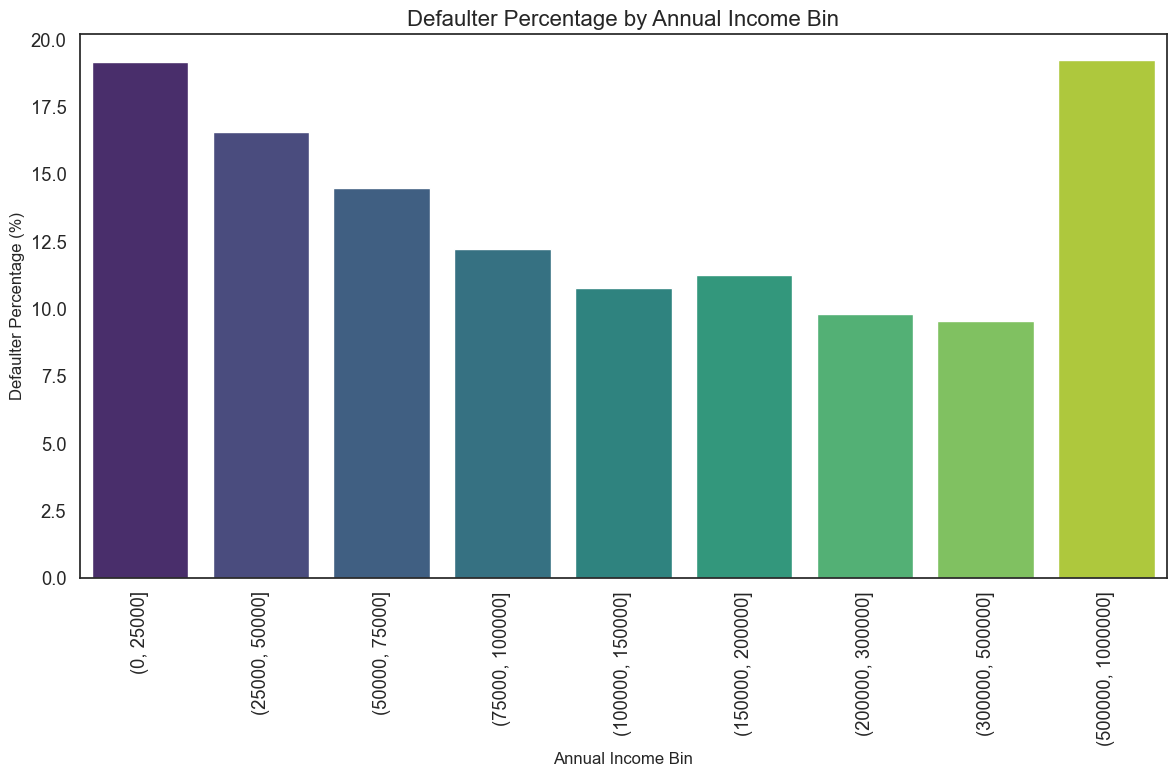

In [77]:
plt.figure(figsize=(12, 8))
sb.barplot(x='income_bin', y='defaulter_perc', data=income_df, palette='viridis')

plt.title('Defaulter Percentage by Annual Income Bin', fontsize=16)
plt.xlabel('Annual Income Bin', fontsize=12)
plt.ylabel('Defaulter Percentage (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Annual Income Bin Range 500000-1000000 has highest risk of defaulters.

**Summerizing all the graphs for Defaulters Graph**

1. Risk analysis of Charged off loaners by Grade: Grade G has highest risk of defaulters.
   
2. Risk Analysis of Charged off by Purpose:

    a) High Default Rates for Small Businesses

    b) Moderate Risk in Renewable Energy and Educational Loans

    c) Lower Default Rates for Major Purchases, Weddings, and Cars
   
3. Risk Analysis of Charged off - Defaulters by Employee Length: 

    a) Consistent Default Rates Across Employment Lengths: All categories ranging close to 15%

    b) Slight Variation: This suggests that employment length does not strongly impact the likelihood of default
   
4. Distribution of Defaulter Percentage Across All Interest Rates: The graph is right-skewed, showing that the majority of defaulter percentages are concentrated at lower values, with fewer instances of high defaulter percentages. The most interest rate range around 20%.
   
5. Risk analysis of Charged off loaners by SubGrade: SubGrade(F5,G3,G2) has highest risk of defaulters.
   
6. Defaulter Percentage by Annual Income Bin: Annual Income Bin Range 500000-1000000 has highest risk of defaulters.